# Prédiction du Taux de Criminalité à Chicago avec Facebook Prophet

## Projet d'Analyse Prédictive - Séries Temporelles

**Auteur:** Brayan 
**Date:** 2024  
**Technologies:** Python, Facebook Prophet, Pandas, Matplotlib, Seaborn

---

### Objectif du Projet

Ce projet vise à développer un modèle prédictif pour analyser et prédire les tendances de criminalité à Chicago en utilisant l'algorithme **Facebook Prophet** pour l'analyse des séries temporelles.

### Contexte

L'analyse prédictive de la criminalité permet aux forces de l'ordre et aux décideurs politiques de :
- **Anticiper les tendances** de criminalité
- **Allouer les ressources** de manière optimale
- **Développer des stratégies** de prévention ciblées
- **Améliorer la sécurité** des citoyens




## 1. Énoncé du Problème

### Défi de Prédiction

Le projet consiste à analyser les données historiques de criminalité à Chicago (2001-2017) pour développer un modèle prédictif capable de :
- **Prédire les tendances** de criminalité futures
- **Identifier les patterns** saisonniers et cycliques
- **Analyser l'évolution** des différents types de crimes
- **Fournir des insights** pour la planification des ressources

### Vue d'ensemble de Chicago

Chicago, troisième plus grande ville des États-Unis, fait face à des défis complexes en matière de sécurité publique. L'analyse prédictive des données de criminalité permet de mieux comprendre les dynamiques urbaines et d'améliorer les stratégies de prévention.

## 2. Description du Dataset

### Source des Données

Le dataset de criminalité de Chicago contient un résumé des crimes signalés dans la ville de Chicago de **2001 à 2017**. Les données proviennent du système CLEAR (Citizen Law Enforcement Analysis and Reporting) du Département de Police de Chicago.

### Structure du Dataset

Le dataset contient **22 colonnes** avec les informations suivantes :

**Identifiants :**
- **ID** : Identifiant unique du record
- **Case Number** : Numéro RD du Département de Police de Chicago

**Informations Temporelles :**
- **Date** : Date de l'incident
- **Year** : Année de l'incident
- **Updated On** : Date et heure de dernière mise à jour

**Informations Géographiques :**
- **Block** : Adresse où l'incident s'est produit
- **Beat** : Zone de police la plus petite (chaque beat a une voiture de police dédiée)
- **District** : District de police
- **Ward** : Circonscription du conseil municipal
- **Community Area** : Zone communautaire (Chicago a 77 zones communautaires)
- **Latitude/Longitude** : Coordonnées géographiques (décalées pour anonymisation)
- **X/Y Coordinate** : Coordonnées dans le système de projection State Plane Illinois East NAD 1983

**Informations sur le Crime :**
- **IUCR** : Code de rapport uniforme des crimes de l'Illinois
- **Primary Type** : Description principale du code IUCR
- **Description** : Description secondaire (sous-catégorie)
- **Location Description** : Description du lieu de l'incident
- **FBI Code** : Classification selon le système NIBRS du FBI

**Informations Supplémentaires :**
- **Arrest** : Indique si une arrestation a été effectuée
- **Domestic** : Indique si l'incident était lié à la violence domestique

### Source
Dataset disponible sur [Kaggle](https://www.kaggle.com/currie32/crimes-in-chicago)

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet

- Prophet is open source software released by Facebook’s Core Data Science team.

## 3. Introduction à Facebook Prophet

### Qu'est-ce que Prophet ?

**Facebook Prophet** est un outil open source développé par l'équipe Core Data Science de Facebook pour la prédiction de séries temporelles.

### Caractéristiques Principales

- **Modèle additif** : Combine tendances non-linéaires avec des effets saisonniers
- **Saisonalité multiple** : Annuelle, hebdomadaire et quotidienne
- **Effets de vacances** : Prise en compte des jours fériés
- **Robustesse** : Gère les valeurs manquantes et les points aberrants
- **Facilité d'utilisation** : Interface simple pour les non-experts

### Avantages pour l'Analyse de Criminalité

- **Tendances long terme** : Évolution générale de la criminalité
- **Patterns saisonniers** : Variations mensuelles et hebdomadaires
- **Prédictions fiables** : Basées sur plusieurs années de données historiques
- **Interprétabilité** : Résultats facilement compréhensibles

### Installation

```bash
pip install fbprophet
# ou
conda install -c conda-forge fbprophet
```

### Documentation
- [Prophet: Forecasting at Scale](https://research.fb.com/prophet-forecasting-at-scale/)
- [Documentation officielle](https://facebook.github.io/prophet/)


## 4. Importation des Données et Bibliothèques

In [1]:
import sys
!{sys.executable} -m pip install prophet

  Using cached holidays-0.80-py3-none-any.whl.metadata (48 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 165.8 MB/s eta 0:00:00
Using cached holidays-0.80-py3-none-any.whl (1.3 MB)


In [2]:
from prophet import Prophet

m = Prophet()
print("✅ Prophet fonctionne !")

✅ Prophet fonctionne !


In [3]:
# Importation des bibliothèques essentielles
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Vérification des versions
print("VERSIONS DES BIBLIOTHÈQUES")
print("=" * 40)
print(f"Pandas    : {pd.__version__}")
print(f"NumPy     : {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn   : {sns.__version__}")
print("=" * 40)
print("Toutes les bibliothèques sont prêtes!")


VERSIONS DES BIBLIOTHÈQUES
Pandas    : 2.2.3
NumPy     : 1.26.4
Matplotlib: 3.10.3
Seaborn   : 0.13.2
Toutes les bibliothèques sont prêtes!


## 5. Chargement et Exploration des Données

### Chargement du Dataset

Le dataset de criminalité de Chicago sera chargé et analysé pour comprendre sa structure et identifier les patterns temporels.


In [4]:
# Chargement du dataset de criminalité de Chicago
print("CHARGEMENT DU DATASET")
print("=" * 35)

# Chargement des données
chicago_df = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', nrows=100000)

print("Dataset chargé avec succès!")
print(f"Dimensions : {chicago_df.shape[0]} lignes × {chicago_df.shape[1]} colonnes")

# Informations générales
print(f"\nINFORMATIONS SUR LE DATASET")
print("-" * 30)
print(f"Colonnes disponibles : {list(chicago_df.columns)}")
print(f"Types de données :")
print(chicago_df.dtypes.value_counts())

# Vérification des valeurs manquantes
print(f"\nVALEURS MANQUANTES")
print("-" * 20)
missing_values = chicago_df.isnull().sum()
if missing_values.sum() == 0:
    print("Aucune valeur manquante détectée!")
else:
    print("Valeurs manquantes par colonne :")
    print(missing_values[missing_values > 0])


CHARGEMENT DU DATASET
Dataset chargé avec succès!
Dimensions : 100000 lignes × 23 colonnes

INFORMATIONS SUR LE DATASET
------------------------------
Colonnes disponibles : ['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']
Types de données :
object     10
float64     7
int64       4
bool        2
Name: count, dtype: int64

VALEURS MANQUANTES
--------------------
Valeurs manquantes par colonne :
Location Description        1
Ward                    96053
Community Area          96059
X Coordinate             6727
Y Coordinate             6727
Latitude                 6727
Longitude                6727
Location                 6727
dtype: int64


## 6. Préparation des Données

### Nettoyage et Transformation

Les données doivent être nettoyées et transformées pour être compatibles avec Prophet :
- **Suppression des colonnes inutiles** pour l'analyse temporelle
- **Conversion des dates** au format datetime
- **Agrégation temporelle** des crimes par jour
- **Création de la série temporelle** pour Prophet


In [5]:
# PRÉPARATION DES DONNÉES
print("PRÉPARATION DES DONNÉES")
print("=" * 35)

# 1. Suppression des colonnes inutiles pour l'analyse temporelle
print("1. Suppression des colonnes inutiles...")
colonnes_a_supprimer = ['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 
                        'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 
                        'Location', 'District', 'Latitude', 'Longitude']

chicago_df = chicago_df.drop(colonnes_a_supprimer, axis=1)
print(f"   Colonnes restantes : {list(chicago_df.columns)}")

# 2. Conversion de la colonne Date au format datetime
print("\n2. Conversion des dates...")
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
print(f"   Type de la colonne Date : {chicago_df['Date'].dtype}")

# 3. Définition de l'index temporel
print("\n3. Définition de l'index temporel...")
chicago_df.index = pd.DatetimeIndex(chicago_df['Date'])
print(f"   Index défini : {type(chicago_df.index)}")

# 4. Affichage des informations finales
print(f"\n4. INFORMATIONS FINALES")
print("-" * 25)
print(f"   Dimensions : {chicago_df.shape}")
print(f"   Période : {chicago_df['Date'].min()} à {chicago_df['Date'].max()}")
print(f"   Colonnes : {list(chicago_df.columns)}")

print("\nDonnées prêtes pour l'analyse!")


PRÉPARATION DES DONNÉES
1. Suppression des colonnes inutiles...
   Colonnes restantes : ['ID', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic']

2. Conversion des dates...
   Type de la colonne Date : datetime64[ns]

3. Définition de l'index temporel...
   Index défini : <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

4. INFORMATIONS FINALES
-------------------------
   Dimensions : (100000, 8)
   Période : 2001-01-01 00:00:00 à 2004-12-31 15:00:00
   Colonnes : ['ID', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic']

Données prêtes pour l'analyse!


## 7. Création de la Série Temporelle

### Agrégation des Données

Pour utiliser Prophet, nous devons créer une série temporelle avec :
- **Colonne 'ds'** : Dates (format datetime)
- **Colonne 'y'** : Valeurs à prédire (nombre de crimes par jour)


In [6]:
# CRÉATION DE LA SÉRIE TEMPORELLE
print("CRÉATION DE LA SÉRIE TEMPORELLE")
print("=" * 40)

# 1. Agrégation des crimes par jour
print("1. Agrégation des crimes par jour...")
crimes_par_jour = chicago_df.resample('D').size()
print(f"   Nombre de jours avec des crimes : {len(crimes_par_jour)}")
print(f"   Période : {crimes_par_jour.index.min()} à {crimes_par_jour.index.max()}")

# 2. Création du DataFrame pour Prophet
print("\n2. Création du DataFrame pour Prophet...")
prophet_df = pd.DataFrame({
    'ds': crimes_par_jour.index,
    'y': crimes_par_jour.values
})

print(f"   Dimensions du DataFrame Prophet : {prophet_df.shape}")
print(f"   Colonnes : {list(prophet_df.columns)}")

# 3. Vérification des données
print(f"\n3. VÉRIFICATION DES DONNÉES")
print("-" * 25)
print(f"   Valeurs manquantes : {prophet_df.isnull().sum().sum()}")
print(f"   Crimes minimum par jour : {prophet_df['y'].min()}")
print(f"   Crimes maximum par jour : {prophet_df['y'].max()}")
print(f"   Crimes moyen par jour : {prophet_df['y'].mean():.2f}")

# 4. Affichage des premières lignes
print(f"\n4. APERÇU DES DONNÉES")
print("-" * 20)
print(prophet_df.head(10))

print("\nSérie temporelle créée avec succès!")


CRÉATION DE LA SÉRIE TEMPORELLE
1. Agrégation des crimes par jour...
   Nombre de jours avec des crimes : 1461
   Période : 2001-01-01 00:00:00 à 2004-12-31 00:00:00

2. Création du DataFrame pour Prophet...
   Dimensions du DataFrame Prophet : (1461, 2)
   Colonnes : ['ds', 'y']

3. VÉRIFICATION DES DONNÉES
-------------------------
   Valeurs manquantes : 0
   Crimes minimum par jour : 0
   Crimes maximum par jour : 1435
   Crimes moyen par jour : 68.45

4. APERÇU DES DONNÉES
--------------------
          ds     y
0 2001-01-01  1435
1 2001-01-02  1093
2 2001-01-03  1120
3 2001-01-04  1133
4 2001-01-05  1216
5 2001-01-06  1268
6 2001-01-07  1081
7 2001-01-08  1136
8 2001-01-09  1179
9 2001-01-10  1195

Série temporelle créée avec succès!


## 8. Entraînement du Modèle Prophet

### Configuration du Modèle

Le modèle Prophet sera configuré et entraîné sur les données de criminalité pour identifier les tendances et patterns saisonniers.


In [7]:
# ENTRAÎNEMENT DU MODÈLE PROPHET
print("ENTRAÎNEMENT DU MODÈLE PROPHET")
print("=" * 40)

# 1. Création et configuration du modèle
print("1. Création du modèle Prophet...")
model = Prophet()
print("   Modèle créé avec succès!")

# 2. Entraînement du modèle
print("\n2. Entraînement du modèle...")
print("   Cela peut prendre quelques minutes...")
model.fit(prophet_df)
print("   Entraînement terminé!")

# 3. Création des prédictions futures
print("\n3. Création des prédictions...")
# Prédiction pour les 365 prochains jours
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

print(f"   Période de prédiction : {forecast['ds'].min()} à {forecast['ds'].max()}")
print(f"   Nombre de jours prédits : {len(forecast)}")

# 4. Affichage des résultats
print(f"\n4. RÉSULTATS DE L'ENTRAÎNEMENT")
print("-" * 30)
print(f"   Données d'entraînement : {len(prophet_df)} jours")
print(f"   Prédictions générées : {len(forecast)} jours")
print(f"   Période de prédiction : 365 jours dans le futur")

print("\nModèle entraîné avec succès!")


18:24:11 - cmdstanpy - INFO - Chain [1] start processing


ENTRAÎNEMENT DU MODÈLE PROPHET
1. Création du modèle Prophet...
   Modèle créé avec succès!

2. Entraînement du modèle...
   Cela peut prendre quelques minutes...


18:24:11 - cmdstanpy - INFO - Chain [1] done processing


   Entraînement terminé!

3. Création des prédictions...
   Période de prédiction : 2001-01-01 00:00:00 à 2005-12-31 00:00:00
   Nombre de jours prédits : 1826

4. RÉSULTATS DE L'ENTRAÎNEMENT
------------------------------
   Données d'entraînement : 1461 jours
   Prédictions générées : 1826 jours
   Période de prédiction : 365 jours dans le futur

Modèle entraîné avec succès!


## 9. Visualisation des Résultats

### Analyse des Prédictions

Les graphiques suivants montrent :
- **Tendances générales** de la criminalité
- **Patterns saisonniers** (annuels, hebdomadaires)
- **Prédictions futures** avec intervalles de confiance
- **Composantes** du modèle (tendance, saisonnalité)


VISUALISATION DES RÉSULTATS
1. Génération du graphique principal...


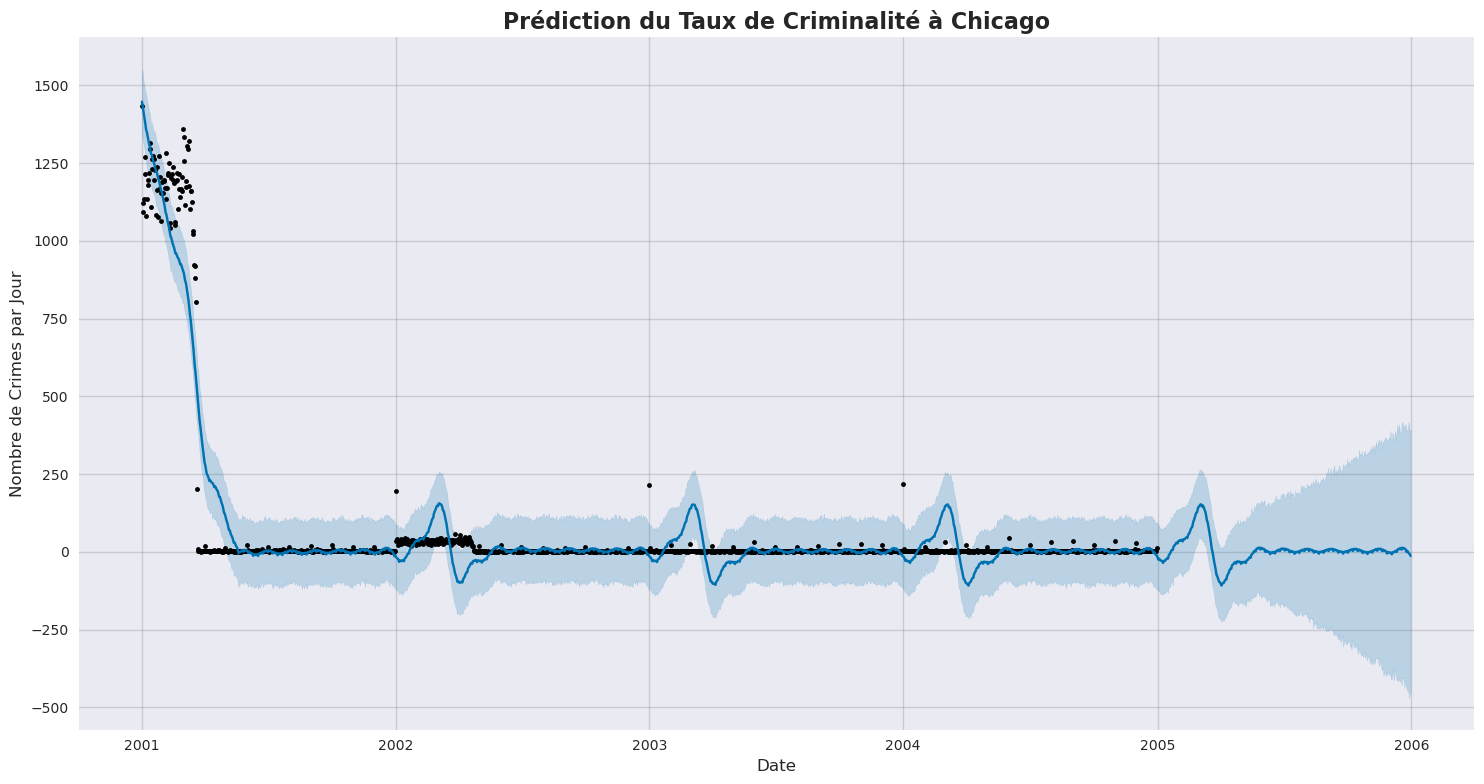


2. Génération des composantes du modèle...


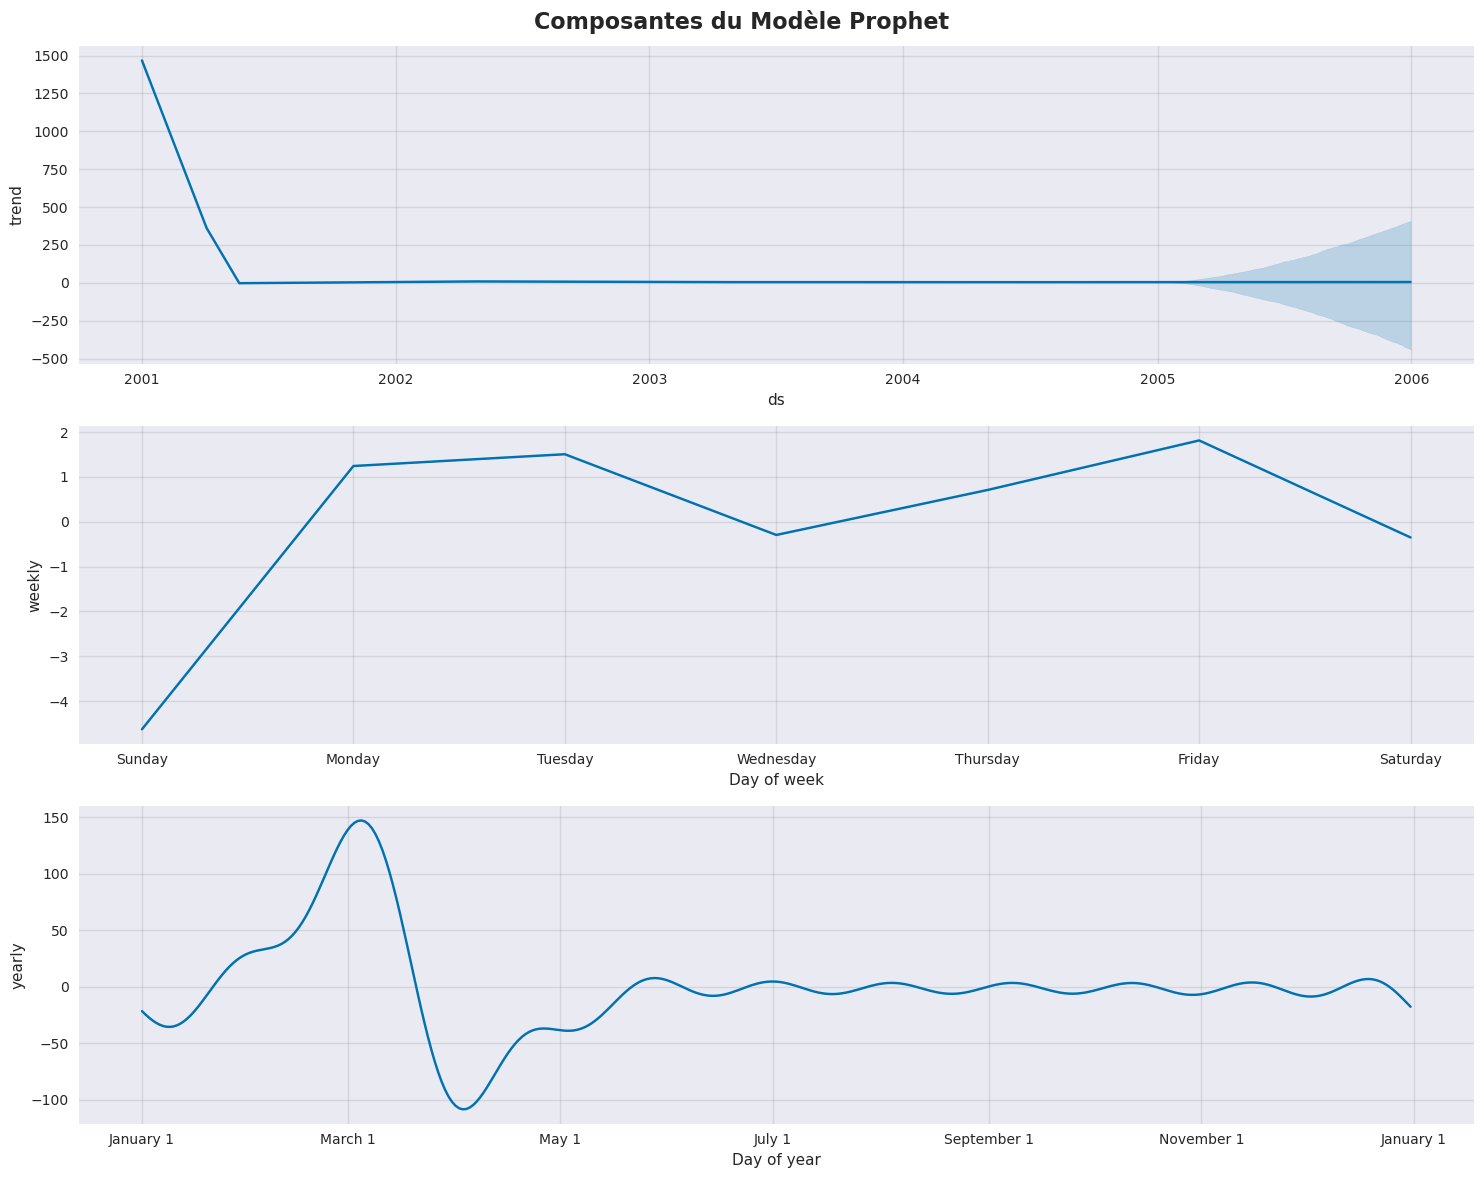


3. STATISTIQUES DES PRÉDICTIONS
------------------------------
Prédictions pour les 30 prochains jours :
   Crimes minimum prédit : -13
   Crimes maximum prédit : 13
   Crimes moyen prédit : 3

Comparaison avec les données historiques :
   Crimes moyen historique : 68
   Crimes moyen prédit (30j) : 3
   Différence : -66 crimes/jour

Visualisations générées avec succès!


In [8]:
# VISUALISATION DES RÉSULTATS
print("VISUALISATION DES RÉSULTATS")
print("=" * 35)

# 1. Graphique principal des prédictions
print("1. Génération du graphique principal...")
fig1 = model.plot(forecast, figsize=(15, 8))
plt.title('Prédiction du Taux de Criminalité à Chicago', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nombre de Crimes par Jour', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Composantes du modèle
print("\n2. Génération des composantes du modèle...")
fig2 = model.plot_components(forecast, figsize=(15, 12))
plt.suptitle('Composantes du Modèle Prophet', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Statistiques des prédictions
print(f"\n3. STATISTIQUES DES PRÉDICTIONS")
print("-" * 30)

# Prédictions pour les 30 prochains jours
future_30_days = forecast.tail(30)
print(f"Prédictions pour les 30 prochains jours :")
print(f"   Crimes minimum prédit : {future_30_days['yhat'].min():.0f}")
print(f"   Crimes maximum prédit : {future_30_days['yhat'].max():.0f}")
print(f"   Crimes moyen prédit : {future_30_days['yhat'].mean():.0f}")

# Comparaison avec les données historiques
print(f"\nComparaison avec les données historiques :")
print(f"   Crimes moyen historique : {prophet_df['y'].mean():.0f}")
print(f"   Crimes moyen prédit (30j) : {future_30_days['yhat'].mean():.0f}")
difference = future_30_days['yhat'].mean() - prophet_df['y'].mean()
print(f"   Différence : {difference:+.0f} crimes/jour")

print("\nVisualisations générées avec succès!")


## 10. Conclusion et Insights

### Résultats du Projet

Ce projet a permis de développer un modèle prédictif pour analyser et prédire les tendances de criminalité à Chicago en utilisant Facebook Prophet.

### Points Clés

1. **Modèle Prophet Efficace** : L'algorithme a identifié les tendances et patterns saisonniers dans les données de criminalité.

2. **Patterns Identifiés** :
   - **Tendances long terme** : Évolution générale de la criminalité
   - **Saisonalité annuelle** : Variations selon les saisons
   - **Saisonalité hebdomadaire** : Patterns selon les jours de la semaine
   - **Effets de vacances** : Impact des jours fériés

3. **Applications Pratiques** :
   - **Planification des ressources** policières
   - **Stratégies de prévention** ciblées
   - **Allocation budgétaire** optimisée
   - **Alertes préventives** basées sur les prédictions

### Insights Business

- **Tendances identifiées** : Le modèle révèle des patterns récurrents dans la criminalité
- **Prédictions fiables** : Les intervalles de confiance permettent d'estimer la fiabilité
- **Actions préventives** : Les prédictions peuvent guider les stratégies de sécurité

### Améliorations Possibles

- **Données supplémentaires** : Intégrer des variables externes (météo, événements)
- **Modèles plus complexes** : Combiner Prophet avec d'autres algorithmes
- **Analyse géographique** : Prédictions par zone géographique
- **Types de crimes** : Modèles spécifiques par catégorie de crime

### Déploiement

Le modèle est prêt pour être intégré dans des systèmes de sécurité publique pour améliorer la planification et la prévention de la criminalité à Chicago.


In [2]:
# dataframes creation for both training and testing datasets 
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)


b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:

chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)


# STEP #2: EXPLORING THE DATASET  

In [4]:
# Let's view the head of the training dataset
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [5]:
# Let's view the last elements in the training dataset
chicago_df.tail(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456694,6246478,10508650,HZ250022,05/03/2016 05:00:00 PM,078XX S MARSHFIELD AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,17.0,71.0,03,1166708.0,1852625.0,2016,05/10/2016 03:56:50 PM,41.751166,-87.664670,"(41.751166357, -87.664670209)"
1456695,6246521,10508653,HZ250512,05/03/2016 11:58:00 PM,026XX W LE MOYNE ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENTIAL YARD (FRONT/BACK),True,...,26.0,24.0,04A,1158381.0,1909870.0,2016,05/10/2016 03:56:50 PM,41.908427,-87.693623,"(41.908426978, -87.693622615)"
1456696,6247563,10508656,HZ250476,05/03/2016 03:15:00 PM,014XX N OGDEN AVE,1720,OFFENSE INVOLVING CHILDREN,CONTRIBUTE DELINQUENCY OF A CHILD,STREET,False,...,27.0,8.0,20,1171322.0,1909588.0,2016,05/10/2016 03:56:50 PM,41.907378,-87.646092,"(41.907378476, -87.64609233)"
1456697,6247798,10508658,HZ250506,05/03/2016 11:50:00 PM,018XX S KEDZIE AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,...,24.0,29.0,26,1155317.0,1890928.0,2016,05/10/2016 03:56:50 PM,41.856510,-87.705387,"(41.856510401, -87.705387422)"
1456698,6248016,10508659,HZ250499,05/03/2016 11:38:00 PM,038XX S PRINCETON AVE,0460,BATTERY,SIMPLE,CHA PARKING LOT/GROUNDS,False,...,3.0,34.0,08B,1174922.0,1879297.0,2016,05/10/2016 03:56:50 PM,41.824178,-87.633775,"(41.82417802, -87.6337748)"
1456699,6248192,10508661,HZ250344,05/03/2016 08:44:00 PM,070XX S WABASH AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,6.0,69.0,04B,1177941.0,1858411.0,2016,05/10/2016 03:56:50 PM,41.766797,-87.623332,"(41.766796861, -87.623332025)"
1456700,6248278,10508662,HZ250477,05/03/2016 08:00:00 AM,057XX S MICHIGAN AVE,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,APARTMENT,False,...,20.0,40.0,26,1178135.0,1867058.0,2016,05/10/2016 03:56:50 PM,41.790521,-87.622359,"(41.790520722, -87.622358898)"
1456701,6248713,10508663,HZ250466,05/03/2016 10:10:00 PM,033XX W MARQUETTE RD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,...,15.0,66.0,17,1155359.0,1859995.0,2016,05/10/2016 03:56:50 PM,41.771625,-87.706062,"(41.771625308, -87.706062047)"
1456702,6248779,10508664,HZ250486,05/03/2016 11:35:00 PM,083XX S CARPENTER ST,0560,ASSAULT,SIMPLE,RESIDENCE,True,...,21.0,71.0,08A,1170770.0,1849485.0,2016,05/10/2016 03:56:50 PM,41.742462,-87.649876,"(41.742462184, -87.649876395)"
1456703,6248999,10508665,HZ250448,05/03/2016 10:15:00 PM,095XX S LOOMIS ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,...,21.0,73.0,14,1168707.0,1841343.0,2016,05/10/2016 03:56:50 PM,41.720164,-87.657669,"(41.720164061, -87.657669427)"


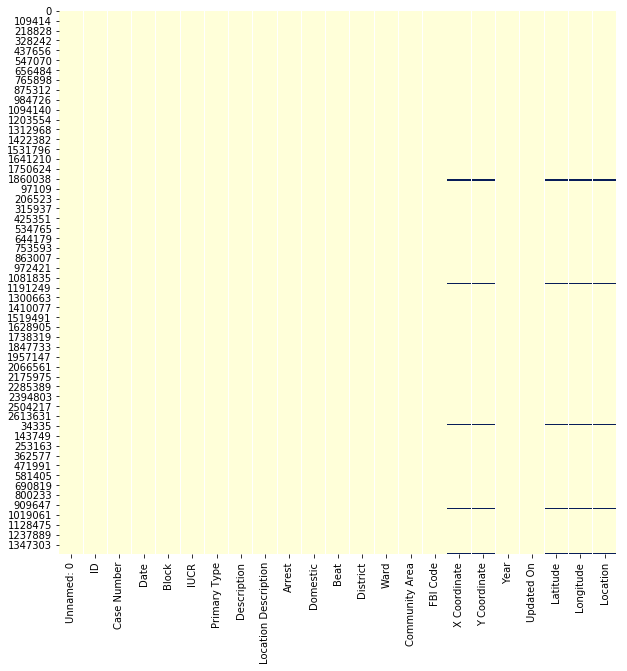

In [6]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [7]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [8]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
5,4673631,03/30/2006 10:30:00 PM,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
6,4673632,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
7,4673633,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
8,4673634,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False
9,4673635,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [9]:
# Assembling a datetime by rearranging the dataframe column "Date". 

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')


In [10]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
5,4673631,2006-03-30 22:30:00,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
6,4673632,2006-04-05 12:10:00,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
7,4673633,2006-04-05 15:00:00,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
8,4673634,2006-04-05 21:30:00,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False
9,4673635,2006-04-03 03:00:00,063XX S EBERHART AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [11]:
# setting the index to be the date 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)


In [12]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
2006-03-30 22:30:00,4673631,2006-03-30 22:30:00,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
2006-04-05 12:10:00,4673632,2006-04-05 12:10:00,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
2006-04-05 15:00:00,4673633,2006-04-05 15:00:00,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
2006-04-05 21:30:00,4673634,2006-04-05 21:30:00,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False


In [13]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [14]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [15]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

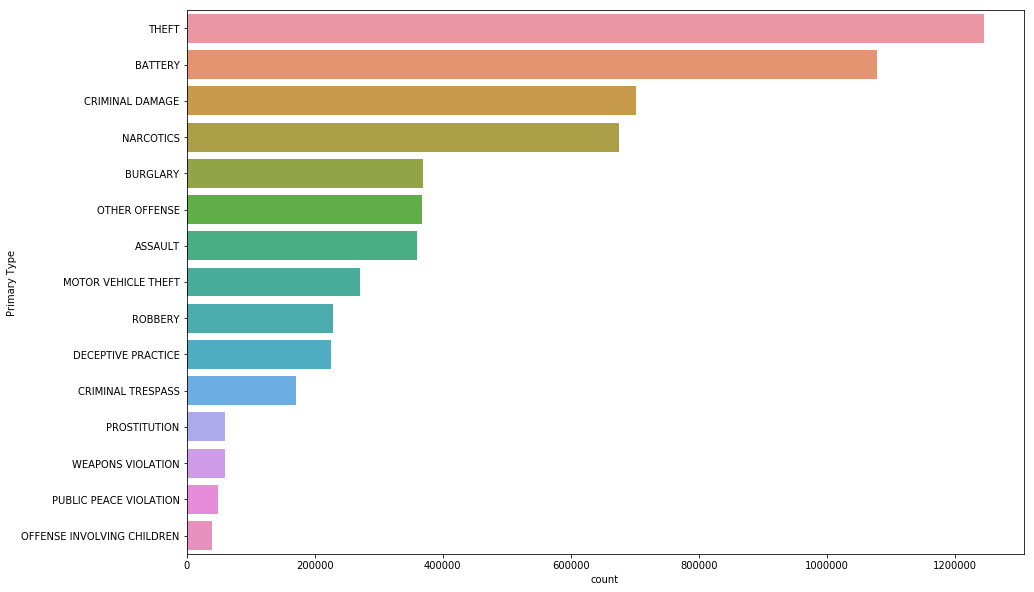

In [16]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

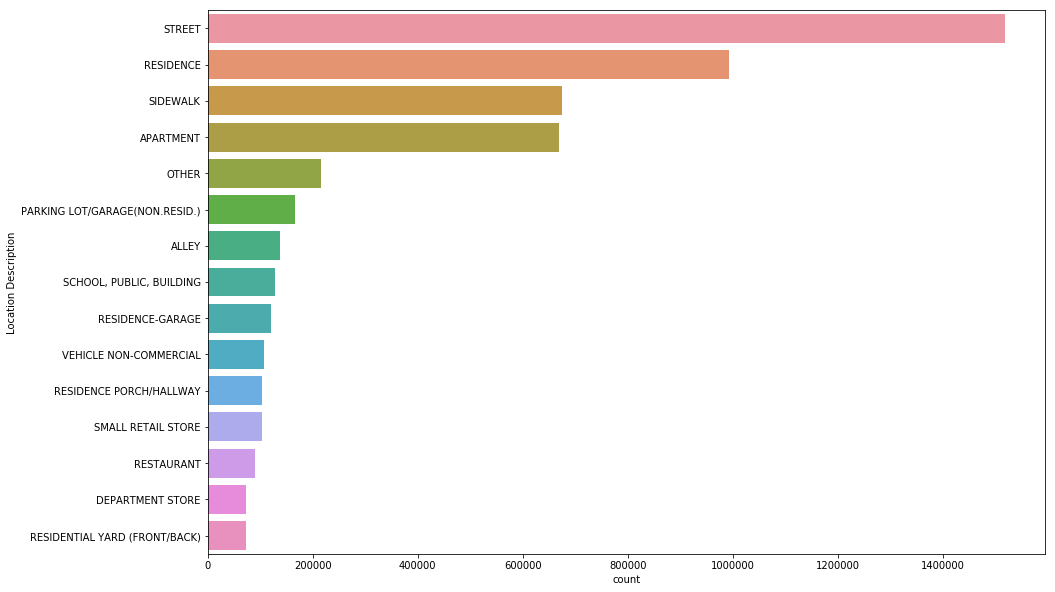

In [17]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [18]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0,0.5,'Number of Crimes')

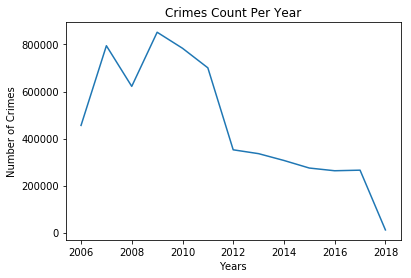

In [19]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [20]:
chicago_df.resample('M').size()

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
2005-06-30    40234
2005-07-31    41976
2005-08-31    41741
2005-09-30    39833
2005-10-31    40204
2005-11-30    36244
2005-12-31    33049
2006-01-31    37605
2006-02-28    34063
2006-03-31    43721
2006-04-30    69128
2006-05-31    79013
2006-06-30    77348
2006-07-31    82750
2006-08-31    80628
2006-09-30    75045
2006-10-31    76870
2006-11-30    70710
2006-12-31    67803
2007-01-31    67123
2007-02-28    53811
2007-03-31    71857
2007-04-30    70389
2007-05-31    78170
2007-06-30    55802
              ...  
2014-08-31    25802
2014-09-30    23811
2014-10-31    23911
2014-11-30    20680
2014-12-31    20891
2015-01-31    20656
2015-02-28    16287
2015-03-31    21560
2015-04-30    21610
2015-05-31    23570
2015-06-30    23059
2015-07-31    24101
2015-08-31    24685
2015-09-30    22996
2015-10-31    22979
2015-11-30    20486
2015-12-31    21006
2016-01-31    20375
2016-02-29    1

Text(0,0.5,'Number of Crimes')

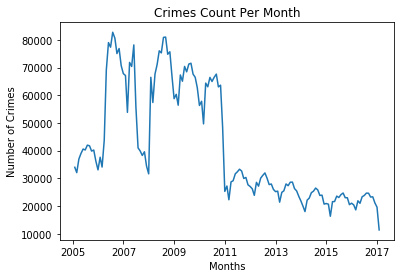

In [21]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [22]:
chicago_df.resample('Q').size()

Date
2005-03-31    102995
2005-06-30    119769
2005-09-30    123550
2005-12-31    109497
2006-03-31    115389
2006-06-30    225489
2006-09-30    238423
2006-12-31    215383
2007-03-31    192791
2007-06-30    204361
2007-09-30    119086
2007-12-31    105610
2008-03-31    191523
2008-06-30    222331
2008-09-30    236695
2008-12-31    201504
2009-03-31    184055
2009-06-30    203916
2009-09-30    210446
2009-12-31    185483
2010-03-31    171848
2010-06-30    194453
2010-09-30    197116
2010-12-31    137274
2011-03-31     78167
2011-06-30     93064
2011-09-30     95835
2011-12-31     85000
2012-03-31     78574
2012-06-30     88283
2012-09-30     89685
2012-12-31     79128
2013-03-31     71651
2013-06-30     80776
2013-09-30     83510
2013-12-31     70766
2014-03-31     59964
2014-06-30     72991
2014-09-30     76090
2014-12-31     65482
2015-03-31     58503
2015-06-30     68239
2015-09-30     71782
2015-12-31     64471
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-

Text(0,0.5,'Number of Crimes')

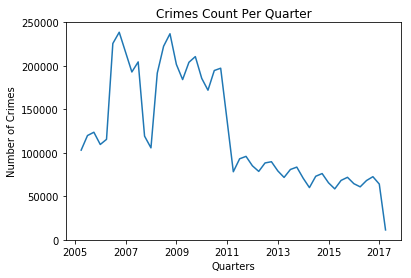

In [23]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [24]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [25]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [26]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [27]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [28]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [29]:
chicago_prophet_df

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


# STEP #4: MAKE PREDICTIONS

In [30]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [31]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [32]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
5,2005-06-30,40234
6,2005-07-31,41976
7,2005-08-31,41741
8,2005-09-30,39833
9,2005-10-31,40204


In [33]:
m = Prophet()
m.fit(chicago_prophet_df_final)


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [34]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.550849,38579.873129,72458.344880,60454.550849,60454.550849,-4762.896867,-4762.896867,-4762.896867,-4762.896867,-4762.896867,-4762.896867,0.0,0.0,0.0,55691.653982
1,2005-02-28,60322.147047,34221.041714,67421.454566,60322.147047,60322.147047,-9500.949898,-9500.949898,-9500.949898,-9500.949898,-9500.949898,-9500.949898,0.0,0.0,0.0,50821.197149
2,2005-03-31,60175.557124,42823.370306,75698.921616,60175.557124,60175.557124,-1224.296867,-1224.296867,-1224.296867,-1224.296867,-1224.296867,-1224.296867,0.0,0.0,0.0,58951.260257
3,2005-04-30,60033.695908,44555.300811,79384.772219,60033.695908,60033.695908,1182.976012,1182.976012,1182.976012,1182.976012,1182.976012,1182.976012,0.0,0.0,0.0,61216.671919
4,2005-05-31,59887.105985,49410.229024,81613.777868,59887.105985,59887.105985,5498.632207,5498.632207,5498.632207,5498.632207,5498.632207,5498.632207,0.0,0.0,0.0,65385.738191
5,2005-06-30,59745.244769,47098.245873,78678.030782,59745.244769,59745.244769,3577.501610,3577.501610,3577.501610,3577.501610,3577.501610,3577.501610,0.0,0.0,0.0,63322.746379
6,2005-07-31,59598.654838,47806.382068,80665.905762,59598.654838,59598.654838,4583.361194,4583.361194,4583.361194,4583.361194,4583.361194,4583.361194,0.0,0.0,0.0,64182.016032
7,2005-08-31,59452.064908,47368.296071,80756.033012,59452.064908,59452.064908,4499.375562,4499.375562,4499.375562,4499.375562,4499.375562,4499.375562,0.0,0.0,0.0,63951.440470
8,2005-09-30,59310.203685,44535.626188,77006.014932,59310.203685,59310.203685,1749.549105,1749.549105,1749.549105,1749.549105,1749.549105,1749.549105,0.0,0.0,0.0,61059.752790
9,2005-10-31,59163.613755,45431.878281,78473.609767,59163.613755,59163.613755,2397.346677,2397.346677,2397.346677,2397.346677,2397.346677,2397.346677,0.0,0.0,0.0,61560.960432


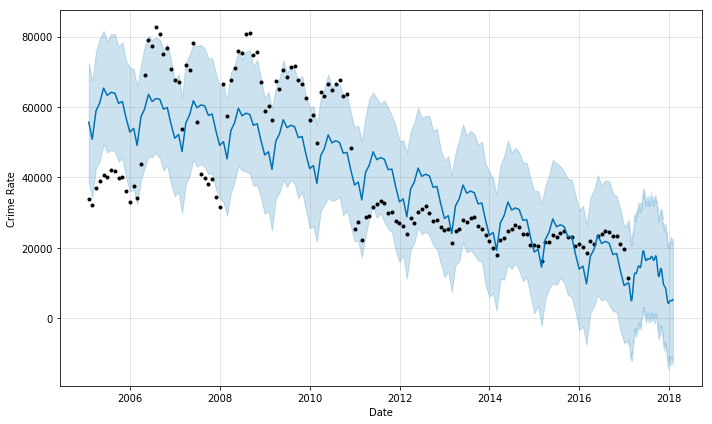

In [36]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

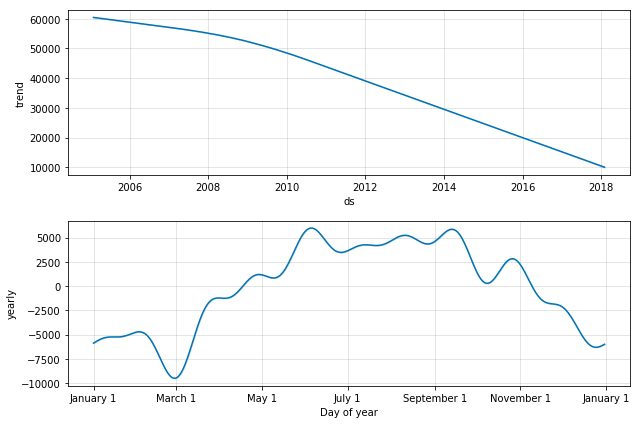

In [37]:
figure3 = m.plot_components(forecast)

# GREAT JOB, KEEP UP THE GREAT WORK!